# 6. 課題解答例

In [1]:
import numpy as np
from matplotlib import pylab as plt

## 課題1
なし

## 課題2

In [2]:
def trigonometric(n):
    "θ, sinθ, cosθの値を出力する"
    x = np.linspace(0.0, 180.0, n+1)
    y1 = np.sin(np.deg2rad(x))
    y2 = np.cos(np.deg2rad(x))
    return x, y1, y2

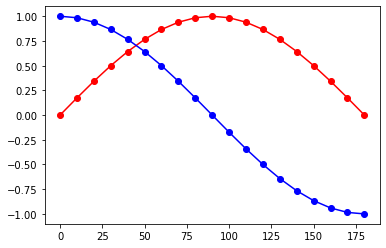

In [3]:
x, y1, y2 = trigonometric(18)
plt.plot(x, y1, 'ro')
plt.plot(x, y2, 'bo')
plt.plot(x, np.sin(np.deg2rad(x)), 'r-')
plt.plot(x, np.cos(np.deg2rad(x)), 'b-')

## 課題3

In [4]:
from scipy import special

def approx_e(n):
    "自然対数の底を級数展開を用いて求める"
    return np.sum(1/special.gamma(np.arange(1, n+1)))

In [5]:
print('{:20} : {:>20.14e}'.format('Approximated', approx_e(10)))
print('{:20} : {:>20.14e}'.format('Exact', np.e))

Approximated         : 2.71828152557319e+00
Exact                : 2.71828182845905e+00


## 課題4

In [6]:
def logistic(m):
    "0 < α < 1 をm分割して，それぞれに対してロジスティック写像を計算"
    a = np.linspace(1.0, 3.0, m)
    p = np.zeros((101, m), dtype=np.float64)
    # 初期条件
    p[0,:] = 0.9
    # 最初の半分は捨てる
    for i in range(100):
        p[0,:] = p[0,:] + a * p[0,:]*(1 - p[0,:])
    # 残りの半分は配列に格納
    for i in range(100):
        p[i+1,:] = p[i,:] + a * p[i,:]*(1 - p[i,:])
    # プロット用に2次元配列に
    a = np.tile(a, (101, 1))
    return a, p

(0.0, 1.4)

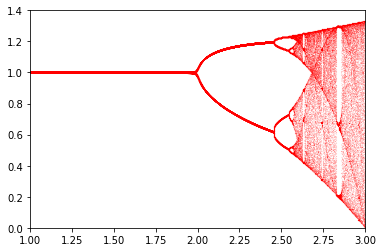

In [7]:
a, p = logistic(2000)
plt.scatter(a, p, s=0.001, color='r')
plt.xlim(1.0, 3.0)
plt.ylim(0.0, 1.4)

## 課題5

In [8]:
def func(x):
    "被積分関数"
    return 4 / np.pi /(1 + x**2)

def trapezoid(n):
    "分割数nの台形公式で関数を積分"
    h = 1/n
    f = func(np.linspace(0.0, 1.0, n+1)) * h
    i = np.arange(1, n)
    return np.sum(f[i]) + 0.5*(f[0] + f[-1])

def simpson(n):
    "分割数nのSimpson公式で関数を積分"
    if n%2 != 0:
        print('Error: n must be even')
        return None
    h = 1/n
    f = func(np.linspace(0.0, 1.0, n+1)) * h/3
    i = np.arange(1, n  , 2) # 奇数
    j = np.arange(2, n-1, 2) # 偶数
    return 4*np.sum(f[i]) + 2*np.sum(f[j]) + (f[0] + f[-1])

         2     1.3239352830e-02     2.6290232908e-03
         4     3.3155740257e-03     7.6477575109e-06
         8     8.2892958631e-04     4.8106518991e-08
        16     2.0723296117e-04     7.5279360523e-10
        32     5.1808249116e-05     1.1763701124e-11
        64     1.2952062417e-05     1.8363088827e-13
       128     3.2380156061e-06     2.8865798640e-15
       256     8.0950390158e-07     0.0000000000e+00
       512     2.0237597542e-07     0.0000000000e+00
      1024     5.0593993772e-08     0.0000000000e+00
      2048     1.2648498249e-08     0.0000000000e+00
      4096     3.1621245622e-09     0.0000000000e+00
      8192     7.9053108504e-10     0.0000000000e+00
     16384     1.9763279901e-10     0.0000000000e+00
     32768     4.9408255265e-11     0.0000000000e+00
     65536     1.2352119327e-11     0.0000000000e+00


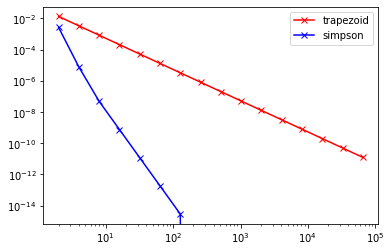

In [9]:
M = 16
n = 2**(np.arange(M)+1)
err1 = np.zeros(M, dtype=np.float64)
err2 = np.zeros(M, dtype=np.float64)

for i in range(M):
    err1[i] = np.abs(trapezoid(n[i]) - 1)
    err2[i] = np.abs(simpson(n[i]) - 1)
    print('{:10} {:>20.10e} {:>20.10e}'.format(n[i], err1[i], err2[i]))

# 結果をプロット
plt.plot(n, err1, 'rx-', label='trapezoid')
plt.plot(n, err2, 'bx-', label='simpson')
plt.loglog()
plt.legend()

## 課題6

In [10]:
def analyze_score(filename):
    "filenameからデータを読んで最高点，最低点，平均点，標準偏差を返す"
    data = np.loadtxt(filename, skiprows=2, dtype=np.int32)
    return data.max(), data.min(), data.mean(), data.std()

In [11]:
smax, smin, savg, sstd = analyze_score('score1.dat')

print('{:20} : {:10}'.format('Best', smax))
print('{:20} : {:10}'.format('Worst', smin))
print('{:20} : {:10.3f}'.format('Average', savg))
print('{:20} : {:10.3f}'.format('Standard deviation', sstd))

Best                 :         98
Worst                :          6
Average              :     46.400
Standard deviation   :     25.115


In [12]:
smax, smin, savg, sstd = analyze_score('score2.dat')

print('{:20} : {:10}'.format('Best', smax))
print('{:20} : {:10}'.format('Worst', smin))
print('{:20} : {:10.3f}'.format('Average', savg))
print('{:20} : {:10.3f}'.format('Standard deviation', sstd))

Best                 :         99
Worst                :         16
Average              :     59.648
Standard deviation   :     14.861


## 課題7

In [13]:
def hist_score(filename, nbin):
    "filenameからデータを読んでヒストグラムを作成する"
    data = np.loadtxt(filename, skiprows=2, dtype=np.int32)
    # ビン境界配列を作成
    bins = np.linspace(0.0, 100.0, nbin+1)
    # ヒストグラム作成("_"はbinsと同じで必要ないので捨てる)
    hist, _ = np.histogram(data, bins=bins)
    return bins, hist

(0, 100)

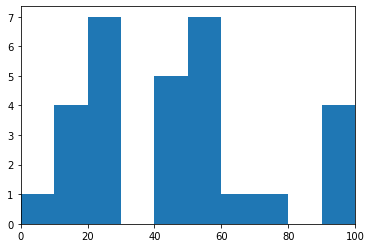

In [14]:
nbin = 10
bins, hist = hist_score('score1.dat', nbin)
binw = bins[+1:] - bins[:-1]
plt.bar(bins[0:-1], hist, width=binw, align='edge')
plt.xlim(0, 100)

(0, 100)

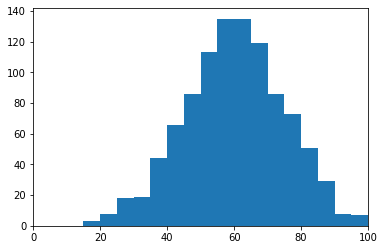

In [15]:
nbin = 20
bins, hist = hist_score('score2.dat', nbin)
binw = bins[+1:] - bins[:-1]
plt.bar(bins[0:-1], hist, width=binw, align='edge')
plt.xlim(0, 100)

(0, 100)

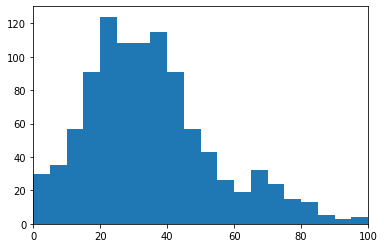

In [16]:
nbin = 20
bins, hist = hist_score('score3.dat', nbin)
binw = bins[+1:] - bins[:-1]
plt.bar(bins[0:-1], hist, width=binw, align='edge')
plt.xlim(0, 100)

## 課題8

In [17]:
def dot_file(filename):
    "filenameから2つのベクトルを読み込み，それらの内積を返す"
    data = np.loadtxt(filename, skiprows=2)
    # 整数としての割り算は //
    n = data.size // 2
    # 前半と後半に分離
    vec1 = data[0:n]
    vec2 = data[n:n*2]
    return np.dot(vec1, vec2)

In [18]:
dot = dot_file('vector.dat')
print('{:20} : {:>20.14e}'.format('Inner product', dot))

Inner product        : 1.11022302462516e-16


## 課題9

In [19]:
def find_var(x, var):
    "varが配列xに含まれているかどうかを調べる"
    return np.any(x == var)

def find_var_index(x, var):
    "varが配列xに含まれている時にはそのインデックスを，そうでない場合は-1を返す"
    index = np.nonzero(x == var)[0]
    return index[0] if index.size != 0 else -1

In [20]:
x = np.array([17, 75, 28, 83, 93, 20, 19, 94, 62, 61])

In [21]:
find_var(x, 28)

True

In [22]:
find_var(x, 25)

False

In [23]:
find_var_index(x, 28)

2

In [24]:
find_var_index(x, 25)

-1

In [25]:
# find_var
x = np.random.randint(0, 10, 10)
v = 5
if find_var(x, v):
    print('{} is in {}'.format(v, x))
else:
    print('{} is not in {}'.format(v, x))

# find_var_index
x = np.random.randint(0, 10, 10)
v = 5
i = find_var_index(x, v)
if i != -1:
    print('{} is in {} at index = {}'.format(v, x, i))
else:
    print('{} is not in {}'.format(v, x))

5 is in [6 2 1 4 0 2 5 6 3 1]
5 is not in [6 0 7 9 6 4 0 8 0 3]


## 課題10

In [26]:
def randexp(l, n):
    "指数分布に従う乱数をn個作成する"
    return -np.log(1 - np.random.random(n))/l

[]

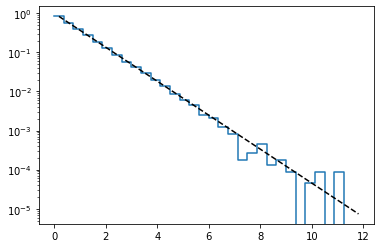

In [27]:
l = 1.0
r = randexp(l, 60000)

# ヒストグラム
hist, bins = np.histogram(r, bins=np.linspace(0, 12, 33), density=True)
plt.step(bins[0:-1], hist, where='post')

# 解析的な分布
x = 0.5*(bins[+1:] + bins[:-1])
y = l * np.exp(-l*x)
plt.plot(x, y, 'k--')

plt.semilogy()

## 課題11

In [28]:
from scipy import special

def mc_hypersphere(n, nrand):
    "n次元超球の体積をモンテカルロ法で求める"
    r = np.random.random((nrand, n))
    d = np.sum(r**2, axis=1)
    return np.count_nonzero(d<1)/nrand * 2**n

def hypersphere(n):
    "ndim次元超球の体積を返す"
    return np.pi**(n/2) / special.gamma(n/2 + 1)

In [29]:
n = 3
nrand = 100000

print('{:20} : {:<20.14e}'.format('Monte-Carlo', mc_hypersphere(n, nrand)))
print('{:20} : {:<20.14e}'.format('Exact', hypersphere(n)))

Monte-Carlo          : 4.17392000000000e+00
Exact                : 4.18879020478639e+00
